In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hdfc-bank/HDFCBANK.NS.csv


In [3]:
import pandas as pd
import numpy as np
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

2024-06-26 06:12:52.954851: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-26 06:12:52.954968: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-26 06:12:53.118394: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
df = pd.read_csv('/kaggle/input/hdfc-bank/HDFCBANK.NS.csv')

In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3202,2024-06-14,1584.000000,1599.000000,1577.699951,1596.900024,1596.900024,12770277.0
3203,2024-06-18,1596.900024,1610.500000,1589.449951,1607.800049,1607.800049,16207857.0
3204,2024-06-19,1613.400024,1669.900024,1604.000000,1657.849976,1657.849976,45065598.0
3205,2024-06-20,1669.800049,1681.449951,1652.000000,1669.349976,1669.349976,20704371.0
3206,2024-06-21,1672.849976,1672.849976,1643.150024,1665.750000,1665.750000,25815388.0


In [7]:
df = df.dropna()

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df = df.drop(columns=['Adj Close'])

df.reset_index(inplace=True)

df = df.drop(columns=['Date'])

In [9]:
df.head()

,Open,High,Low,Close,Volume
0,231.899994,233.945007,231.000000,233.375000,4133790.0
1,234.899994,238.994995,234.154999,238.315002,8287730.0
2,238.300003,243.184998,237.264999,241.615005,10256190.0
3,242.940002,243.000000,240.455002,242.304993,6096810.0
4,243.500000,249.899994,243.500000,248.910004,10252440.0


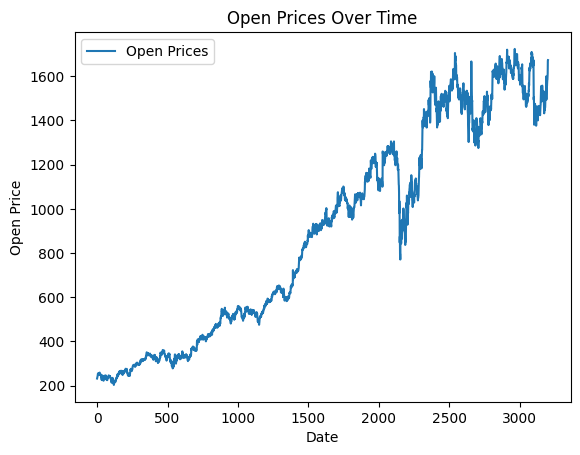

In [10]:
plt.plot(df['Open'], label='Open Prices')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open Prices Over Time')
plt.legend()
plt.show()

In [11]:
dataset = df.values

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, :])
        y.append(data[i + seq_length, 3])
    return np.array(X), np.array(y)

seq_length = 20

X, y = create_sequences(dataset, seq_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2385, 20, 5)
y_train shape: (2385,)
X_test shape: (796, 20, 5)
y_test shape: (796,)


In [12]:
print(X_train[0])

[[1.01550000e+03 1.04487500e+03 1.01100000e+03 1.03997498e+03
  8.28970200e+06]
 [1.03997498e+03 1.05850000e+03 1.03830005e+03 1.04522498e+03
  7.82709400e+06]
 [1.04750000e+03 1.05650000e+03 1.04132495e+03 1.05244995e+03
  3.96914400e+06]
 [1.05400000e+03 1.05950000e+03 1.04850000e+03 1.05702502e+03
  4.34514400e+06]
 [1.05812500e+03 1.06350000e+03 1.05680005e+03 1.06132495e+03
  5.43784200e+06]
 [1.06252502e+03 1.06500000e+03 1.05292505e+03 1.05862500e+03
  3.60865400e+06]
 [1.05600000e+03 1.07247498e+03 1.05332495e+03 1.06132495e+03
  6.11782200e+06]
 [1.05665002e+03 1.07144995e+03 1.05665002e+03 1.06982495e+03
  3.51818200e+06]
 [1.06900000e+03 1.07400000e+03 1.06240002e+03 1.06484998e+03
  4.88619400e+06]
 [1.07000000e+03 1.07000000e+03 1.05280005e+03 1.05509998e+03
  3.72069400e+06]
 [1.05367505e+03 1.05405005e+03 1.03909998e+03 1.05032495e+03
  4.20826200e+06]
 [1.05340002e+03 1.05900000e+03 1.04300000e+03 1.04494995e+03
  3.56937200e+06]
 [1.04484998e+03 1.05407495e+03 1.039099

In [ ]:
inputs = Input(shape=(seq_length, X.shape[2]))

x = LSTM(100, return_sequences=True)(inputs)
x = Dropout(0.2)(x)

x = LSTM(50)(x) 
x = Dropout(0.2)(x)

outputs = Dense(1)(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=RMSprop(), loss='mse', metrics=['mae'])
model.summary()

In [12]:
history = model.fit(X_train, y_train,
                    epochs=200,
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 1001407.1875 - mae: 880.8312 - val_loss: 1001235.1875 - val_mae: 872.2480
Epoch 2/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1021261.5000 - mae: 892.2394 - val_loss: 994387.6875 - val_mae: 868.3139
Epoch 3/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1029543.6875 - mae: 895.5076 - val_loss: 987801.8125 - val_mae: 864.5132
Epoch 4/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1002134.5000 - mae: 879.8382 - val_loss: 981247.6875 - val_mae: 860.7143
Epoch 5/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1005171.8125 - mae: 882.8698 - val_loss: 974768.5625 - val_mae: 856.9421
Epoch 6/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 988238.7500 - mae: 875.5516 - val_loss: 968307.0625 - val_mae: 853.1637
Epoch 7/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 954362.6250 - mae: 855.6045 - val_loss: 961844.4375 - val_mae: 849.3678
Epoch 8/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 972161.2500 - mae

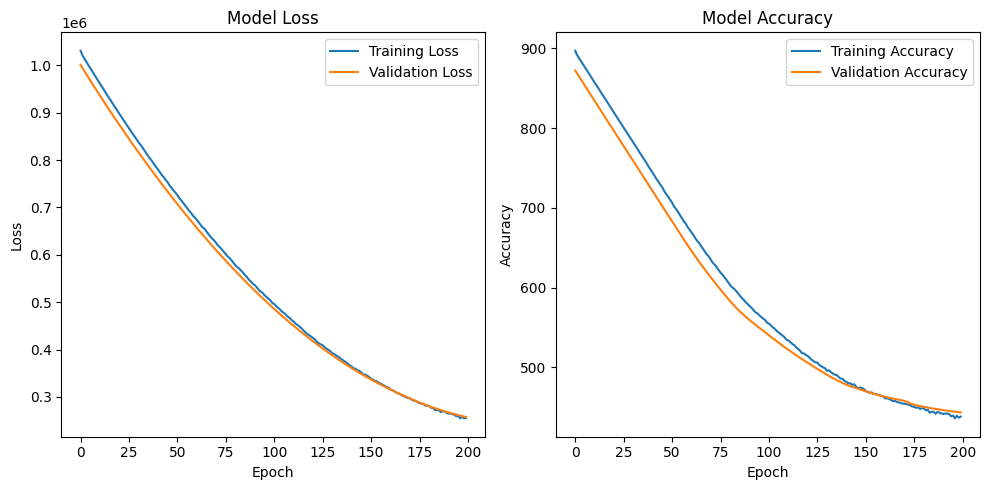

In [14]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training Accuracy')
plt.plot(history.history['val_mae'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


array([[746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [405.23837],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
       [746.15234],
